## Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#v1. variance of Wavelet Transformed image (continuous)
#v2. skewness of Wavelet Transformed image (continuous)

data = pd.read_csv('data_banknote_authentication.txt',names=['V1','V2','V3','V4','V5']) #columns names
columns = ['V3','V4','V5'] #Extra columns (?)
data.drop(columns, inplace=True, axis=1)
data.head(5) #first 5

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [3]:
data.describe()
# statistical measures of each column

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


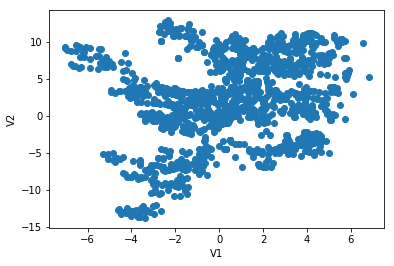

In [12]:
v1 = data['V1']
v2 = data['V2']

plt.xlabel('V1')
plt.ylabel('V2')
plt.scatter(v1,v2)
plt.savefig("fig1")
plt.show()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


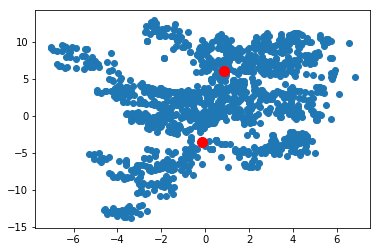

In [6]:
mean_skew = np.column_stack((v1,v2))

km_res = KMeans(n_clusters=2).fit(mean_skew)

clusters = km_res.cluster_centers_

plt.scatter(v1, v2)
plt.scatter(clusters[:,0], clusters[:,1], s=100, color="red")

data.describe()

array([[ 0.86960048,  6.12717909],
       [-0.12376677, -3.45591266]])

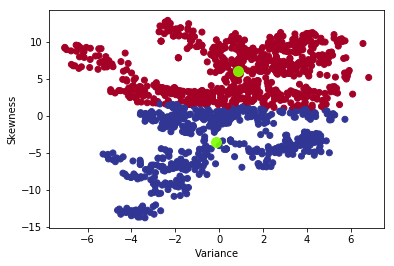

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
data = pd.read_csv('data_banknote_authentication.txt',names=['V1','V2','V3','V4','V5'])


#v1. variance of Wavelet Transformed image (continuous)
#v2. skewness of Wavelet Transformed image (continuous)
V1 = data['V1']
V2 = data['V2']

mean_skewness = np.column_stack((V1, V2))
km_res = KMeans(n_clusters=2).fit(mean_skewness)
clusters = km_res.cluster_centers_

plt.xlabel('Variance')
plt.ylabel('Skewness')

preds = km_res.predict(mean_skewness)
plt.scatter(V1, V2, c=preds, cmap="RdYlBu")
plt.scatter(clusters[:,0], clusters[:,1], s=100, alpha = 0.90, color="chartreuse")
plt.savefig("fig2")
clusters